ALGORITMOS DE APRENDIZAJE NO SUPERVISADO

Integrantes :
Dalia Dominguez 


Realizar un análisis exploratorio de los datos c
 

In [9]:
#carga de las librerias
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y el analisis de datos 
import seaborn as sns # creacion graficos estadisticos 
import matplotlib.pyplot as plt #creacion de graficos en dos dimenciones 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')


In [10]:
#lectura de datos en python cargar variable BD
BD = pd.read_csv('Mall_Customers.csv')

In [11]:
#lectura de datos 
BD.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# mirara tamaño de la BD
BD.shape

(200, 5)

In [13]:
data=BD.drop(['Gender'], axis=1)

In [14]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [15]:
BD.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
#mirar cantidad de valores nulos
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


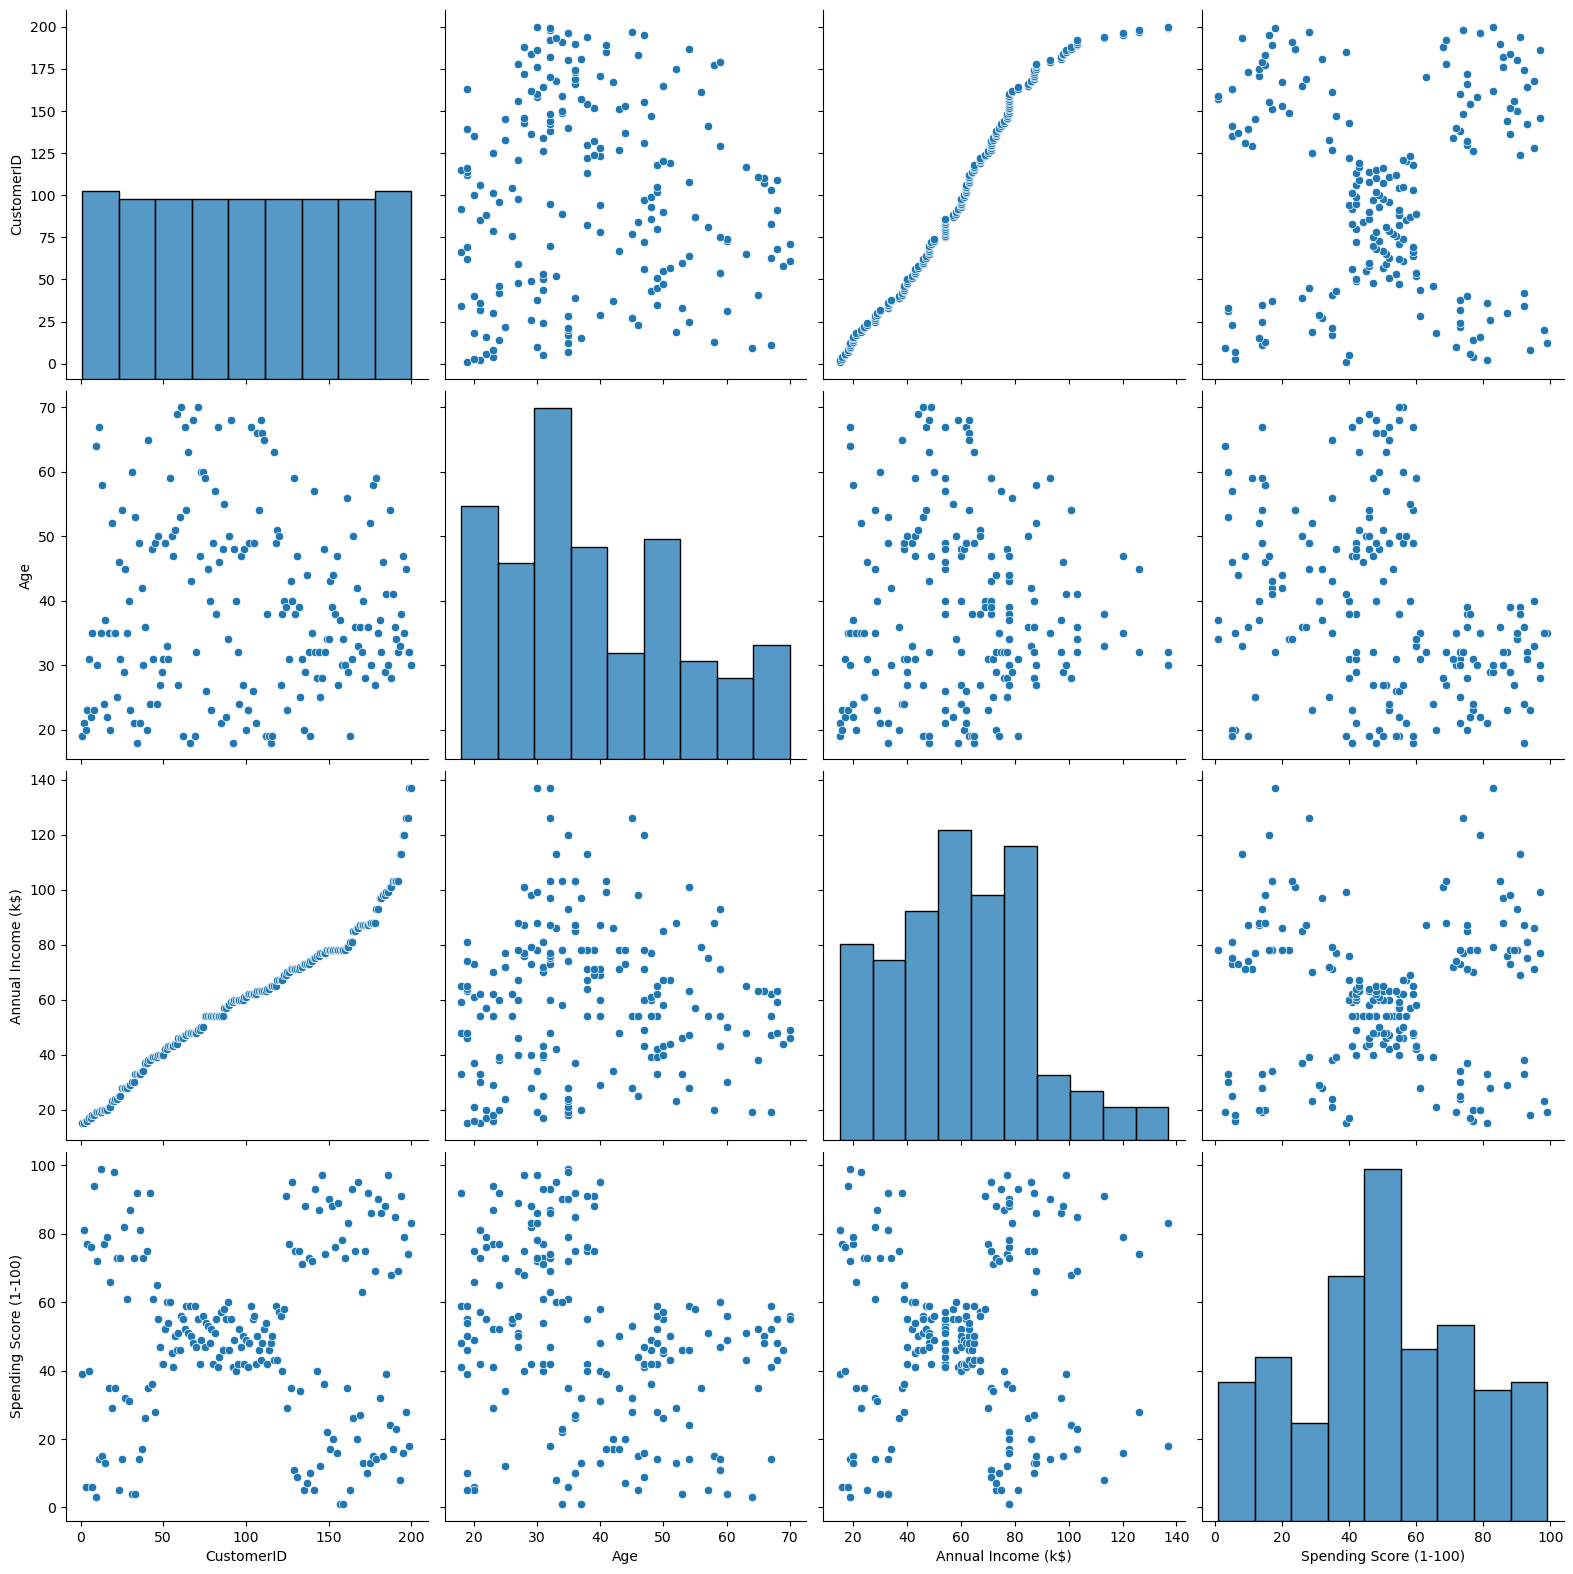

In [10]:
#diagrama de dispercion
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [18]:
#matriz de correlacion 
corr_matrix=data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

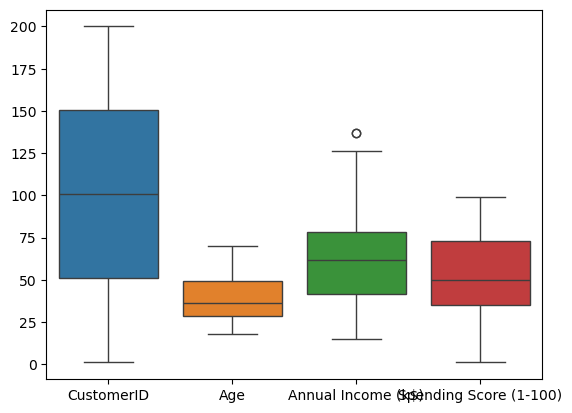

In [19]:
# diagrama de caja 
sns.boxplot(data=data)

In [31]:
# estandarizar los datos antes de aplicar  K_Means
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(data), columns =data.columns)
x


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


K_MEANS

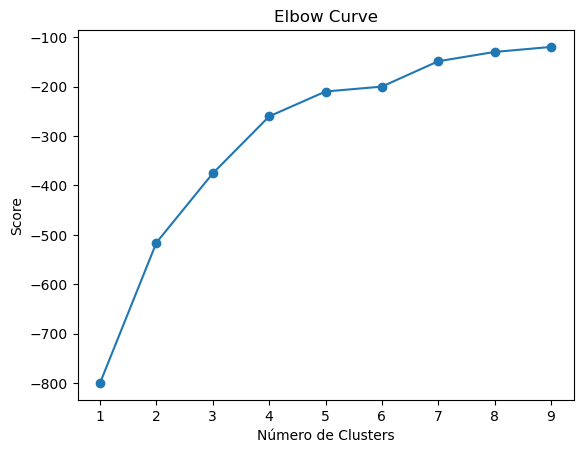

In [21]:
Nc= range (1, 10)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score =[kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score 
plt.plot(Nc,score, marker= 'o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [22]:
kmeans = KMeans(n_clusters=6).fit(x)
centroids = kmeans.cluster_centers_
centroids

array([[-0.31704457,  1.20427626, -0.25619985, -0.04067824],
       [ 1.03142803, -0.43908961,  0.95706585,  1.1919166 ],
       [-0.78176424, -0.99120839, -0.74439195,  0.48870372],
       [ 0.7770077 , -0.12989771,  0.60002343, -1.22365559],
       [ 1.44281636,  0.4892096 ,  1.58174114, -1.11288474],
       [-1.33905697,  0.47895722, -1.30822992, -1.19644353]])

In [23]:
#obtenemos las etiquetas de cada punto de nuestro datos 
labels = kmeans.labels_
#centroides
C= kmeans.cluster_centers_
colores=['red','green','cyan','pink','blue','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])

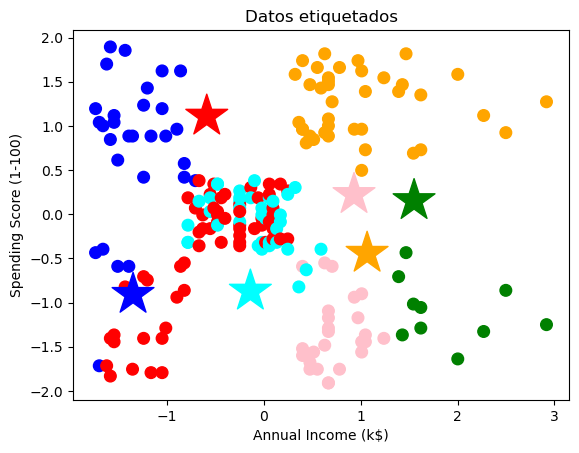

In [17]:


f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

            


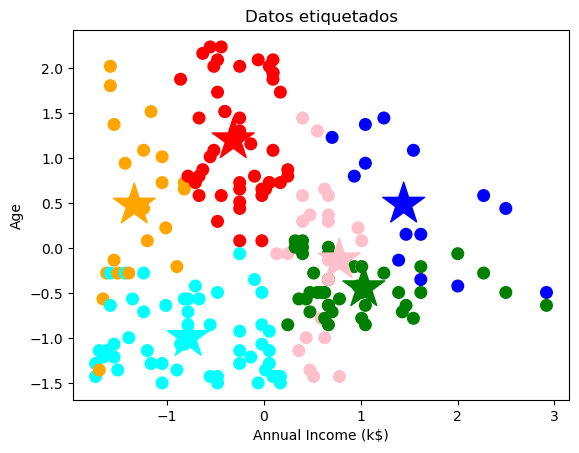

In [24]:
f1 = x['Annual Income (k$)'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()


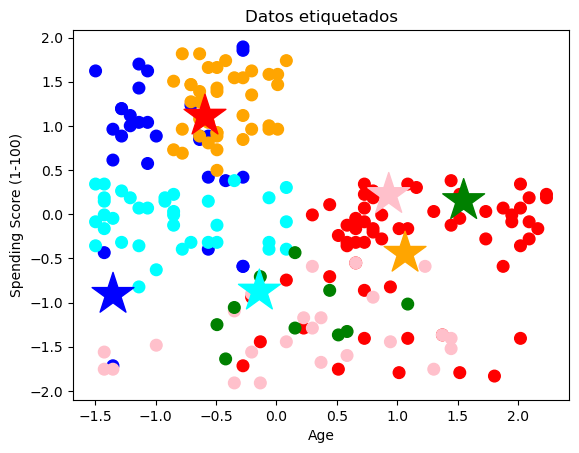

In [19]:
f1 = x['Age'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [25]:
x_new = scaler.fit_transform(np.array([[5,32,18,41]]))
new_label = kmeans.predict(x_new)
color=[]
for row in new_label:
    color.append(colores[row])

print(new_label)
print(color)

[0]
['red']


In [27]:
#calcular medidas de calidad para K_Means
print("medidas de calidad para K_Means:")
print("puntaje de silueta:", metrics.silhouette_score(x, labels))
print("indice de calinski_Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inertia (suma de cuadrado dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))


medidas de calidad para K_Means:
puntaje de silueta: 0.39723092342776967
indice de calinski_Harabasz: 122.20012622545784
Inertia (suma de cuadrado dentro de los clusters): 192.794879902969
Davies-Bouldin Index: 0.9994521270061827


Interpretar, analizar y documentar los resultados obtenido

Hieraechical clustering

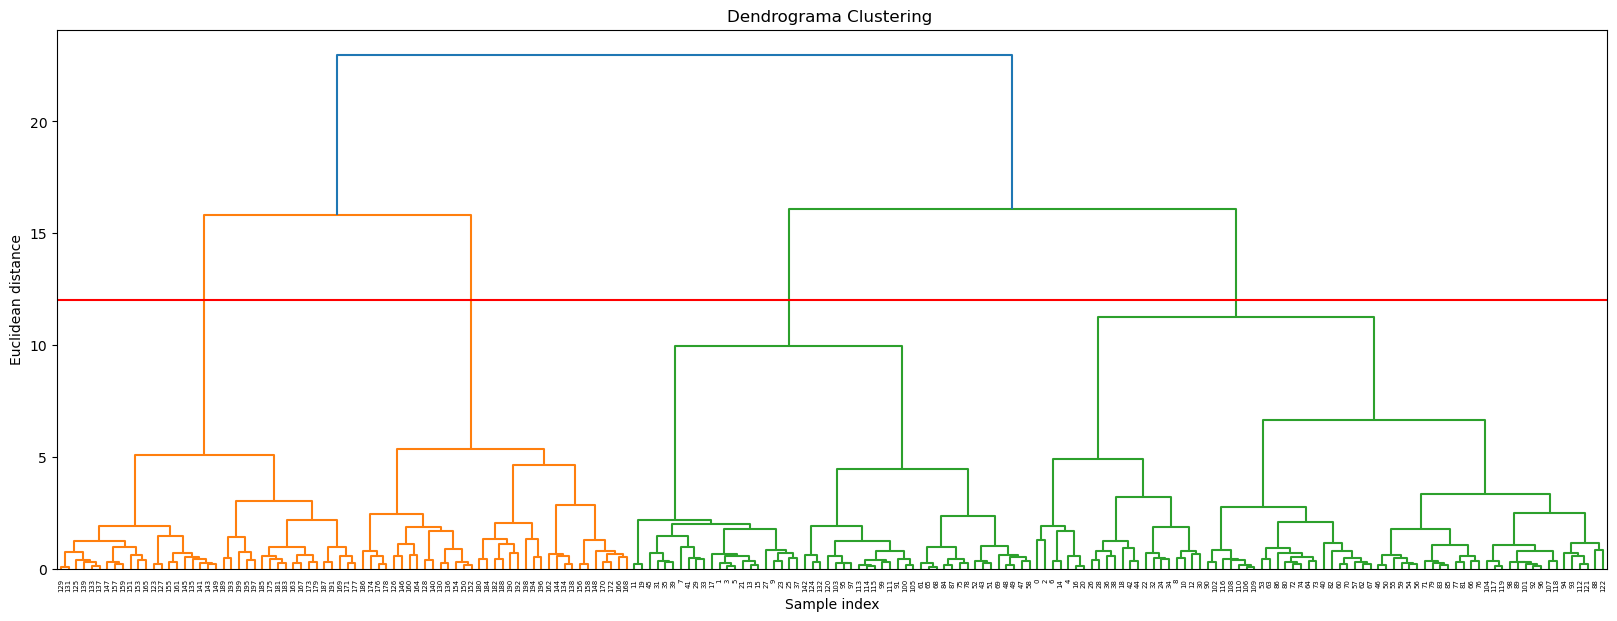

In [28]:
ward_clustering = linkage(x, method ="ward", metric = "euclidean")
plt.figure(figsize = (20,7))
dendrogram(ward_clustering)
plt.axhline(y =12, color = 'r', linestyle = '-')
plt.title('Dendrograma Clustering ')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [29]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [30]:
#obtenemos las etiquetas de cada punto de nuestros datos 
labels = labels_hier
colores = ['red','green','cyan','blue']
asignar =[]
for row in labels:
    asignar.append(colores[row])

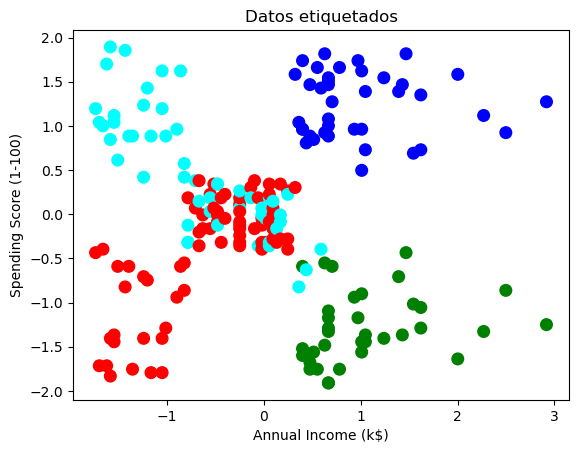

In [32]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [33]:
#metodo silhouette para identificar numero adecuado de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity = 'euclidean',
                    linkage  = 'ward',
                    n_clusters=n_clusters
             )
    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_solhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6,3.4))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolucion de media de los indices silhouette")
ax.set_xlabel('Numero clusters')
ax.set_ylabel('Media indices solhouette');

    
        
        

    

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [35]:
#calcular medidas de calidad para clustering jerarquico
print("\nMedidas de calidad para clustering Jerarquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davivies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))



Medidas de calidad para clustering Jerarquico:
Puntaje de silueta: 0.39231254266034143
Indice de Calinski-Harabasz: 119.44498361793892
Davivies-Bouldin Index: 0.9713829128749328


In [38]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 2,
       4, 5, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [39]:
#calcular medidas de calidad para clustering jerarquico
print("\nMedidas de calidad para clustering Jerarquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davivies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))



Medidas de calidad para clustering Jerarquico:
Puntaje de silueta: 0.42832993481997816
Indice de Calinski-Harabasz: 143.6561433644843
Davivies-Bouldin Index: 0.787609522022419


In [41]:
#coheficiente de correlacion cofenetica
from scipy.cluster.hierarchy import linkage
#compute the distances
x_dist = pdist(x)
# compute the linkage matrix
z= linkage(x, 'ward')
#calcular el cophenetic correlation coefficient
coef_cofenetico = cophenet(z, x_dist)
print("coeficiente de correlacion cofenetica:", coef_cofenetico)


coeficiente de correlacion cofenetica: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))
